In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import df
tweets = pd.read_csv('train.csv')

In [4]:
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
tweets.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [7]:
tweets

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


# EDA

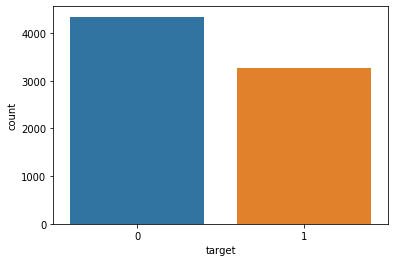

In [8]:
#explore target
sns.countplot(x='target',data=tweets)
#observations: fairly even

In [11]:
#explore keyword var
tweets['keyword'].value_counts().head(50)

fatalities             45
armageddon             42
deluge                 42
body%20bags            41
sinking                41
damage                 41
harm                   41
outbreak               40
fear                   40
collided               40
windstorm              40
siren                  40
twister                40
evacuate               40
explosion              39
earthquake             39
hellfire               39
whirlwind              39
wreckage               39
collision              39
sinkhole               39
sunk                   39
derailment             39
famine                 39
wrecked                39
weapons                39
flames                 39
weapon                 39
fire                   38
thunder                38
derailed               38
deaths                 38
ambulance              38
bombed                 38
drowned                38
fatal                  38
injury                 38
upheaval               38
explode     

In [12]:
tweets['keyword'].nunique()

221

In [36]:
#explore location
tweets['location'].value_counts()

USA                           104
New York                       71
United States                  50
London                         45
Canada                         29
                             ... 
Murray Hill, New Jersey         1
Torrance, CA                    1
Georgia ? Tennessee             1
United Kingdom,Fraserburgh      1
Justin and Ariana follow        1
Name: location, Length: 3341, dtype: int64

In [62]:
tweets['location'].nunique()

3341

In [63]:
tweets.groupby(by='target').describe()

id                                                           \
         count         mean          std   min      25%     50%     75%   
target                                                                    
0       4342.0  5276.446338  3157.206802  23.0  2513.25  5243.5  8038.5   
1       3271.0  5661.608071  3097.094809   1.0  3104.50  5676.0  8252.0   

                 
            max  
target           
0       10848.0  
1       10873.0

# Feature Engineering

In [40]:
#adjust keywords var to group together keywords < x freq & location < y freq




In [ ]:
#investigate the word fire - suspect it may be causing mis-identification (fire = slang for cool)
    #is it in stop words?



In [13]:
#preview tweet 1
tweets.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [14]:
tweets['text'][1]

'Forest fire near La Ronge Sask. Canada'

In [15]:
#create a length of tweet var
tweets['length'] = tweets['text'].apply(len)

In [16]:
tweets.head()

,id,keyword,location,text,target,length
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88


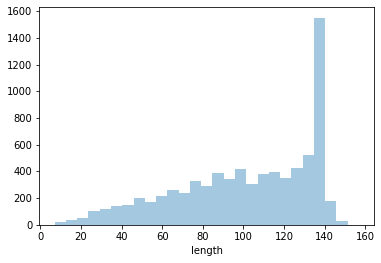

In [17]:
#explore tweet length
sns.distplot(tweets['length'],kde=False)
#observations: all basically below the 140 limit mark for Twitter...largest bin is right under that 140 char mark

In [18]:
#check details on our tweet length feature
tweets['length'].describe()

count    7613.000000
mean      101.037436
std        33.781325
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: length, dtype: float64

In [19]:
#view the longest tweet (out of curiosity)
tweets[tweets['length']==157]['text'].iloc[0]

"when you're taking a shower and someone flushes the toilet and you have .1 second to GTFO or you get burned??????????????????????????????????????????????????"

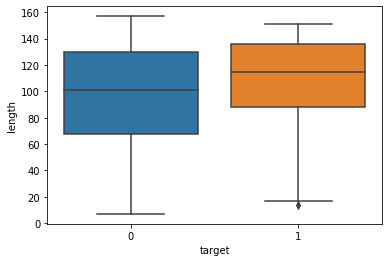

In [20]:
#view a boxplot for legit tweets (1) vs phony (0) and their length
sns.boxplot(x='target', y='length', data=tweets)
#observations: it looks like legit disaster tweets tend to be longer in length...this should be a good feature for our model

In [21]:
#bag of words approach
import string

In [22]:
test = 'Sample message! Notice: it has punctuation.'

In [23]:
#check characters to see if they are in punctuation
nopunc = [char for char in test if char not in string.punctuation]

In [24]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

In [25]:
#import stopwords (words that are very commonly used in strings but hold no value)
from nltk.corpus import stopwords

In [26]:
#view these words
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
#since nopunc is currently just a list of single characters, let's join it back
#to original form (space separated = '')
nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
#split our phrase into a list of individual words
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

In [30]:
# Now just remove any stopwords (from the nltk library that we obtained)
clean_test = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
#note that word.lower() ensures that capitalization is accounted for

In [31]:
clean_test #now we've filtered out any of those common "stopwords" that are meaningless (e.g., it, has)

['Sample', 'message', 'Notice', 'punctuation']

In [32]:
#this function essentially replicates what we did above (read docstring in red)
def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
#preview first 5 records of original df
tweets['text'].head()

0    Our Deeds are the Reason of this #earthquake M...
1               Forest fire near La Ronge Sask. Canada
2    All residents asked to 'shelter in place' are ...
3    13,000 people receive #wildfires evacuation or...
4    Just got sent this photo from Ruby #Alaska as ...
Name: text, dtype: object

In [34]:
#Tokenize our df, previewing on first 5 records to see if function works
tweets['text'].head().apply(text_process)
#observations: looks like it works well!

0    [Deeds, Reason, earthquake, May, ALLAH, Forgiv...
1        [Forest, fire, near, La, Ronge, Sask, Canada]
2    [residents, asked, shelter, place, notified, o...
3    [13000, people, receive, wildfires, evacuation...
4    [got, sent, photo, Ruby, Alaska, smoke, wildfi...
Name: text, dtype: object

In [35]:
#convert text tokens into vectors
from sklearn.feature_extraction.text import CountVectorizer

In [36]:
#here we are setting analyzer to our pre-defined function and fitting the CountVectorizer to our tweets
bow_transformer = CountVectorizer(analyzer=text_process).fit(tweets['text'])

In [38]:
# Print total number of vocab words
print(len(bow_transformer.vocabulary_))
#observation: we have 26,500ish words in our vocabulary

26473


In [39]:
#check out one of our tweets
tweet3 = tweets['text'][2]
print(tweet3)

All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected


In [40]:
#run this tweet through our CountVectorizer function
bow3 = bow_transformer.transform([tweet3])

In [41]:
print(bow3)

  (0, 11920)	1
  (0, 14502)	1
  (0, 14579)	1
  (0, 22210)	1
  (0, 22300)	1
  (0, 22409)	1
  (0, 22760)	2
  (0, 23526)	1
  (0, 24081)	2


In [42]:
#check what words are occuring twice
print(bow_transformer.get_feature_names()[22760])
print(bow_transformer.get_feature_names()[24081])

place
shelter


In [43]:
#after testing our bow_transformer on a single message, let's apply to the df
tweets_bow = bow_transformer.transform(tweets['text'])

In [44]:
print('Shape of Sparse Matrix: ', tweets_bow.shape)
print('Amount of Non-Zero occurences: ', tweets_bow.nnz)
#observations: 7613 rows by 26473 columns, with 75006 non-zero occurances

Shape of Sparse Matrix:  (7613, 26473)
Amount of Non-Zero occurences:  75006


In [45]:
#TF/IDF
from sklearn.feature_extraction.text import TfidfTransformer

In [46]:
#we fit this to our transformed df
tfidf_transformer = TfidfTransformer().fit(tweets_bow)

In [47]:
#test with tweet 3 again
tfidf3 = tfidf_transformer.transform(bow3)

In [48]:
print(tfidf3)
#observations: we now have the TF-IDF for this message - interpret this as a
#weighted value for each of these words (vocab word 24081 has the highest
#TD-IDF value at 0.561)

  (0, 24081)	0.5613046397730426
  (0, 23526)	0.2806523198865213
  (0, 22760)	0.45018963832847503
  (0, 22409)	0.25115024210462317
  (0, 22300)	0.26481385183374734
  (0, 22210)	0.311530042058862
  (0, 14579)	0.2436306150448398
  (0, 14502)	0.2141285372629417
  (0, 11920)	0.26084472748805637


In [49]:
#now apply it to the entire bow
tweets_tfidf = tfidf_transformer.transform(tweets_bow)

In [56]:
print(tweets_tfidf.shape)
#matches the same dimensions

(7613, 26473)


In [68]:
#preview tfidf metric matrix
print(tweets_tfidf)

  (0, 25690)	0.2753430915183584
  (0, 14250)	0.3203164754114372
  (0, 8499)	0.3860077891601951
  (0, 6754)	0.33665717852153604
  (0, 4299)	0.43806692361763977
  (0, 3209)	0.418853446034574
  (0, 827)	0.43806692361763977
  (1, 22068)	0.3058762040061879
  (1, 14837)	0.24620203194640247
  (1, 9128)	0.4692720083702215
  (1, 8772)	0.4692720083702215
  (1, 6116)	0.378319142950699
  (1, 4297)	0.3211608286734195
  (1, 2364)	0.39890126574308604
  (2, 24081)	0.5613046397730426
  (2, 23526)	0.2806523198865213
  (2, 22760)	0.45018963832847503
  (2, 22409)	0.25115024210462317
  (2, 22300)	0.26481385183374734
  (2, 22210)	0.311530042058862
  (2, 14579)	0.2436306150448398
  (2, 14502)	0.2141285372629417
  (2, 11920)	0.26084472748805637
  (3, 26071)	0.4024513325168046
  (3, 23345)	0.4718026141633829
  :	:
  (7610, 4966)	0.3733393270349695
  (7610, 7)	0.4234292453366492
  (7611, 25185)	0.28175682903350985
  (7611, 24793)	0.2957812313138078
  (7611, 24011)	0.25501340323729477
  (7611, 23611)	0.295781231

In [73]:
tweets_tfidf_df = pd.DataFrame(tweets_tfidf.toarray())

In [74]:
tweets_tfidf_df

,0,1,2,3,4,5,6,7,8,9,...,26463,26464,26465,26466,26467,26468,26469,26470,26471,26472
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7608,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.423429,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#convert our tokenized tfidf data into a df
tweets_tfidf_df = pd.DataFrame(tweets_tfidf.toarray(), columns=TfidfVectorizer().get_feature_names())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 6 columns):
id          7613 non-null int64
keyword     7552 non-null object
location    5080 non-null object
text        7613 non-null object
target      7613 non-null int64
length      7613 non-null int64
dtypes: int64(3), object(3)
memory usage: 357.0+ KB


# Training a Model

In [52]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [53]:
#create model to detect false disaster tweets using naive bayes
legit_tweet_model = MultinomialNB().fit(tweets_tfidf,tweets['target'])

In [54]:
#test model on our favourite tweet 3
print(legit_tweet_model.predict(tfidf3))
#observation: we predict that this tweet is about a real disaster

[1]


In [55]:
#confirming whether this tweet was legit (we were right)
tweets['target'][2]

1

# Train/Test Split

In [154]:
from sklearn.model_selection import train_test_split

In [216]:
tweet_train, tweet_test, target_train, target_test = train_test_split(tweets['text'], tweets['target'], test_size=0.2)

In [217]:
#test one of them
tweet_train.head()

792     City program to help turn blight into greenspa...
1404    @LasVegasLocally @VitalVegas They reined it in...
4052    Photo: blue by @forest.fires source: http://t....
710     Follow @EdWelchMusic and check out his Hit Sin...
3790    #SigAlert: North &amp; Southbound 133 closed b...
Name: text, dtype: object

# Creating Data Pipeline

In [218]:
#this allows us to not have to go through all our process (count vectorization,
#transformation, etc.) for each of the train/test split matrices...

#use Sci-kit learn's PIPELINE FEATURE

from sklearn.pipeline import Pipeline

In [259]:
#this pipeline will do all the major NLP steps/transforms we performed manually above
#still need to have the functions defined before (e.g., text_process, TfidTransformer)

pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classifier',MultinomialNB()) #using Naive Bayes (could switch to RFClassifier)
])

In [260]:
#fit our training data to the papeline
pipeline.fit(tweet_train, target_train)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x0000018FFC8FFC18>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('Classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [261]:
predictions = pipeline.predict(tweet_test)

In [262]:
predictions

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

# Model Evaluation

In [167]:
from sklearn.metrics import classification_report, confusion_matrix

In [263]:
print(classification_report(target_test,predictions))
#note that Naive Bayes classifier performed better than Random Forest classifier (about 1-2% higher in f1-score)

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       881
           1       0.84      0.66      0.74       642

    accuracy                           0.80      1523
   macro avg       0.81      0.78      0.79      1523
weighted avg       0.81      0.80      0.80      1523



In [264]:
print(confusion_matrix(target_test,predictions))

[[800  81]
 [219 423]]


# Build Submission

In [244]:
#import sample submission file
sample_submission = pd.read_csv('sample_submission.csv')

In [245]:
#import test df
tweets_testset = pd.read_csv('test.csv')

In [246]:
tweets_testset.head(10)

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
5,12,NaN,NaN,We're shaking...It's an earthquake
6,21,NaN,NaN,They'd probably still show more life than Arse...
7,22,NaN,NaN,Hey! How are you?
8,27,NaN,NaN,What a nice hat?
9,29,NaN,NaN,Fuck off!


In [247]:
#perform same feature engineering and transformations
tweets_testset['length'] = tweets_testset['text'].apply(len)

In [248]:
#make predictions on the true test set
predictions_real = pipeline.predict(tweets_testset['text'])

In [249]:
len(predictions_real)

3263

In [250]:
#add to the submission file
sample_submission["target"] = pipeline.predict(tweets_testset['text'])

In [251]:
#preview our submission file
sample_submission

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,0
3259,10865,1
3260,10868,1
3261,10874,1


In [252]:
#export our predictions to csv for submission
sample_submission.to_csv("Basic TFIDF Logistic Classifier.csv", index=False)